# Instructions
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting, submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit

1) data(1, 8888) data2 
2) data(1, 9633) data2
3) data(1384, 8499) data2
4) data(2000, 9633) data2
5) data(1, 3000) data3
6) data(3001, 6002) data3
7) data(1000, 8000) data1
8) data(1500, 9633) data1
9) data(1, 8650) data1
 0) data(1, 9633) data1

* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


# SECTION 1
* Import all required
* Make sure that all the import statements are written in the below python cell

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# SECTION 2:
* Import the dataset given to you and name it with your name.
* Example: your name: john
  Name of dataframe : john_df

In [36]:
df=pd.read_excel('data1.xlsx')
anuj_df = df.iloc[1000:8000].copy()

In [37]:
anuj_df.head()

,Hookload,STP,SPM,WOB,RPM,Torque,ROP,TotDepth,BitDepth,Block_Pos,TD_Dleg,TD_Dleg_cumu,TD_MW,TD_Fun_Vis,Total_Load,FLOW_OUT_REL,Qmud,dDepth
1000,122.228713,179.563020,124.0,7.792723,100.004297,1037.706139,27.979119,2923.109,2923.240717,11.903963,1.864608,1.982913,1.270777,53,130.021436,0,691.177071,-0.131717
1001,122.204614,179.566812,124.0,7.816931,100.003238,1037.936733,28.025564,2923.169,2923.292918,11.844299,1.867556,1.982913,1.270792,53,130.021545,0,691.177071,-0.123918
1002,122.180683,179.570495,124.0,7.840921,100.002396,1038.165050,28.072010,2923.229,2923.345119,11.784635,1.870505,1.982913,1.270807,53,130.021604,0,691.177071,-0.116119
1003,122.156921,179.574069,124.0,7.864683,100.001762,1038.390990,28.118455,2923.288,2923.397321,11.724971,1.873405,1.982913,1.270822,53,130.021604,0,691.177071,-0.109321
1004,122.133337,179.577535,124.0,7.888218,100.001347,1038.614554,28.164901,2923.348,2923.449522,11.665307,1.876354,1.982913,1.270837,53,130.021554,0,691.177071,-0.101522


# SECTION 3
 Preprocessing
* Remove duplicates if they are present
* Fill null values with the mean(Roll no: Even)/median (Roll no: ODD) if any are found
  
  ***Feature scaling:***
* Min-Max Scaling (Normalization) Roll No: Even
* Standardization (Z-Score Normalization) Roll No: ODD

  ***Correlation Heatmap***
 * Drop the columns based on the heat map if required 

In [12]:
anuj_df.drop_duplicates(inplace=True)

In [20]:
anuj_df.isnull().sum()

Hookload        0
STP             0
SPM             0
WOB             0
Torque          0
ROP             0
TotDepth        0
Block_Pos       0
TD_Dleg         0
TD_MW           0
Total_Load      0
FLOW_OUT_REL    0
dDepth          0
dtype: int64

In [15]:
anuj_df.fillna(anuj_df.median(), inplace=True)


In [17]:
from sklearn.preprocessing import StandardScaler
numeric_columns = anuj_df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
anuj_df[numeric_columns] = scaler.fit_transform(anuj_df[numeric_columns])
print(anuj_df)


      Hookload       STP       SPM       WOB       RPM    Torque       ROP  \
1000 -1.732986 -1.803948  0.351325 -0.128188 -0.659607 -0.873848  1.942133   
1001 -1.742861 -1.803131  0.351325 -0.114843 -0.659794 -0.864802  1.949092   
1002 -1.752668 -1.802337  0.351325 -0.101618 -0.659942 -0.855844  1.956051   
1003 -1.762405 -1.801567  0.351325 -0.088519 -0.660054 -0.846980  1.963011   
1004 -1.772069 -1.800820  0.351325 -0.075545 -0.660128 -0.838209  1.969970   
...        ...       ...       ...       ...       ...       ...       ...   
7995  2.491965  0.297882 -2.501529 -1.481853  1.988316  0.048476 -0.437810   
7996  2.490955  0.285973 -2.515981 -1.480412  1.988316  0.049789 -0.437675   
7997  2.489884  0.273933 -2.530433 -1.478884  1.988316  0.051180 -0.437598   
7998  2.488752  0.261760 -2.544886 -1.477268  1.988316  0.052652 -0.437521   
7999  2.487563  0.249457 -2.559338 -1.475565  1.988316  0.054205 -0.437444   

      TotDepth  BitDepth  Block_Pos   TD_Dleg  TD_Dleg_cumu    

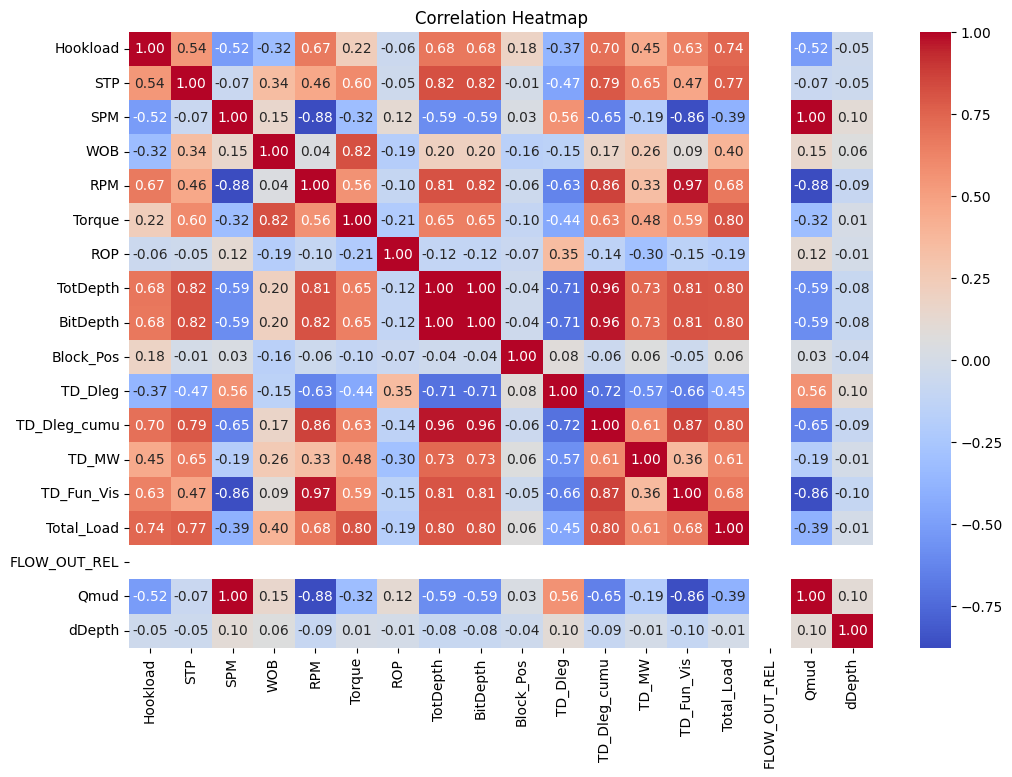

In [18]:

correlation_matrix = anuj_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
anuj_df.drop(columns=['FLOW_OUT_REL'], inplace=True)

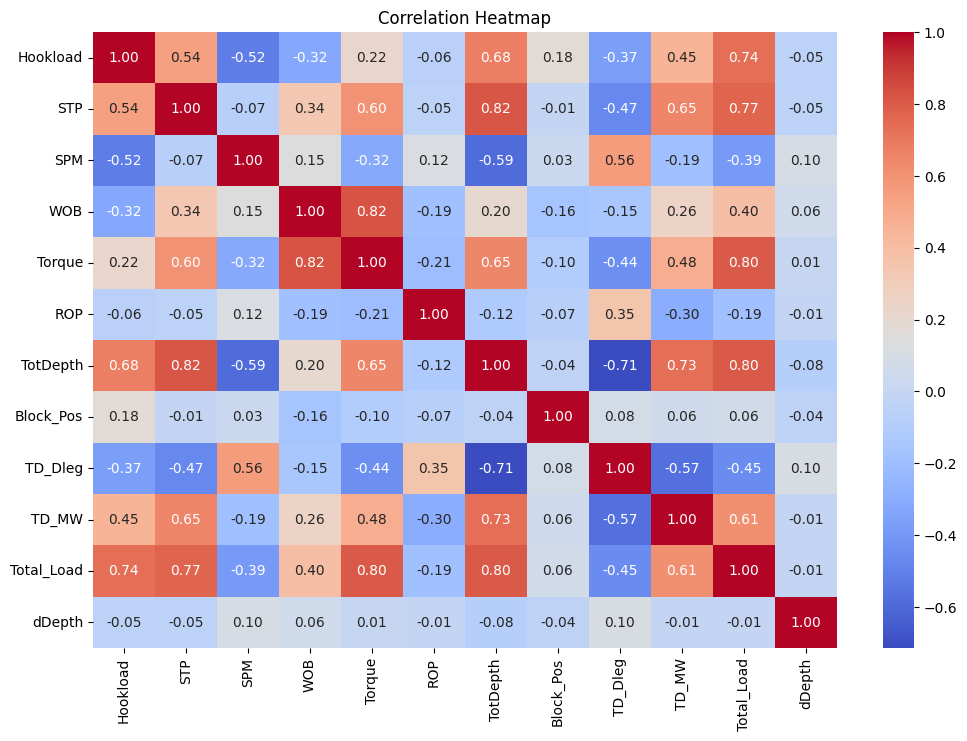

In [23]:

correlation_matrix = anuj_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# SECTION 4: (apply Principal Component Analysis (PCA), LDA, t-SNE without removing outliers)
 ***Feature Extraction***
* Interested people, please read this article below before doing PCA
* https://mayuresh0501.wixsite.com/data-blog-post/post/mathematical-intuition-behind-principal-component-analysis-pca
* Perform PCA.
* Print all necessary for PCA results.
* Plot new pC1,pc2,pc3
* Generate a Scree Plot for PCA, LDA.
* Scatter plot for t-SNE
* Interested people write generic code to perform PCA, LDA, t-SNE.
* Refer to the video  https://youtu.be/Lsue2gEM9D0?feature=shared
* Refer to article https://www.linkedin.com/pulse/step-by-step-explanation-principal-component-analysis-sheetal/

Explained Variance Ratio: [0.5176141  0.14405159 0.08657053]


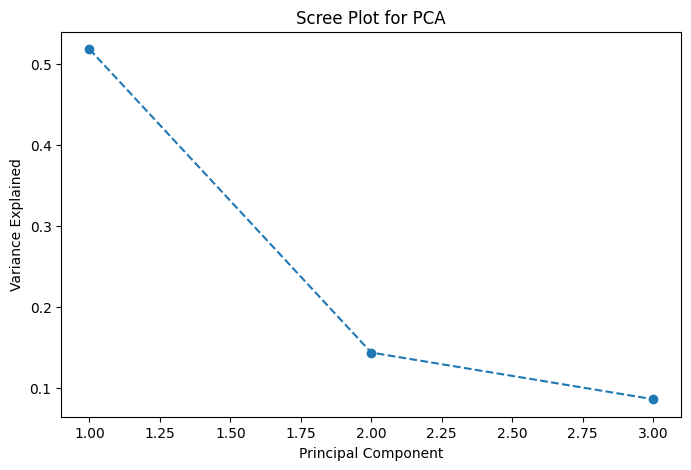

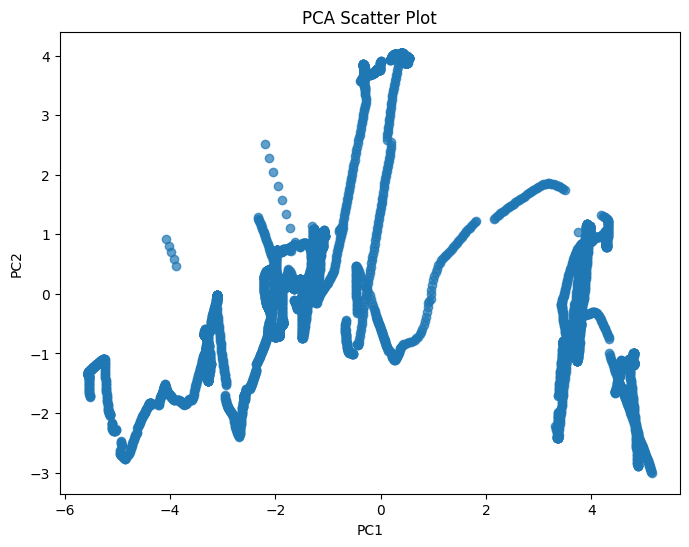

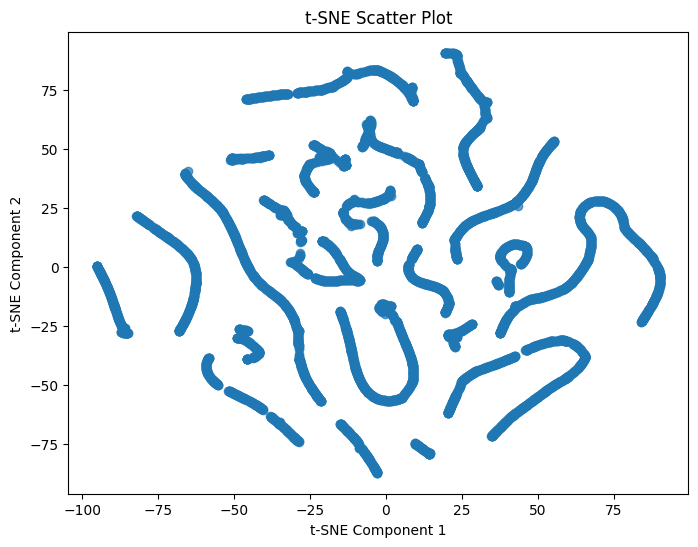

In [46]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'anuj_df' is your dataset

# Convert numerical columns to categorical where necessary
for col in anuj_df.columns:
    if anuj_df[col].nunique() < 10:  # Assuming columns with fewer than 10 unique values are categorical
        anuj_df[col] = anuj_df[col].astype(str)

# Encode categorical columns
label_encoders = {}
for col in anuj_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    anuj_df[col] = le.fit_transform(anuj_df[col])
    label_encoders[col] = le

# Selecting numeric columns for scaling
numeric_columns = anuj_df.select_dtypes(include=['number']).columns

# Applying Standardization (Z-Score Normalization)
scaler = StandardScaler()
anuj_df[numeric_columns] = scaler.fit_transform(anuj_df[numeric_columns])

# Save the normalized dataset to a new Excel file
anuj_df.to_excel("normalized_data.xlsx", index=False)

# PCA Implementation
pca = PCA(n_components=3)
pca_result = pca.fit_transform(anuj_df[numeric_columns])

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Scree Plot for PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot for PCA")
plt.show()

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot")
plt.show()

# LDA Implementation (assuming a categorical target column 'target')
if 'target' in anuj_df.columns:
    lda = LDA(n_components=2)
    lda_result = lda.fit_transform(anuj_df[numeric_columns], anuj_df['target'])
    
    # Scree Plot for LDA
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, lda.explained_variance_ratio_.shape[0] + 1), lda.explained_variance_ratio_, marker='o', linestyle='--')
    plt.xlabel("Linear Discriminant")
    plt.ylabel("Variance Explained")
    plt.title("Scree Plot for LDA")
    plt.show()

# t-SNE Implementation
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(anuj_df[numeric_columns])

# Scatter plot of t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.show()


# SECTION 5: (Perform outlier removal, and apply Principal Component Analysis (PCA)), LDA, t-SNE
 ***Outlier removal***
 * Z-Score Method (Standardization) Roll No: Even
 * Interquartile Range (IQR) Method Roll No: ODD
 
 ***Feature Extraction***
* Perform PCA.
* Print all necessary for PCA results.
* Plot new PC1,PC2,PC3
* Generate a Scree Plot for PCA, LDA.
* Scatter plot for t-SNE

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming 'anuj_df' is your input DataFrame

# Step 1: Identify numeric columns only
numeric_columns = anuj_df.select_dtypes(include=['number']).columns

# Step 2: Calculate Z-Scores for numeric columns
z_scores = np.abs(zscore(anuj_df[numeric_columns]))

# Step 3: Define a threshold (commonly 3)
threshold = 3

# Step 4: Identify rows where all column Z-Scores are below the threshold
outlier_mask = (z_scores < threshold).all(axis=1)

# Step 5: Keep only non-outlier rows
anuj_df_no_outliers = anuj_df[outlier_mask]

# Step 6: Print the results
print(f"Original Dataset Shape: {anuj_df.shape}")
print(f"Dataset Shape After Removing Outliers: {anuj_df_no_outliers.shape}")

# Save the results to a new file (optional)
anuj_df_no_outliers.to_excel("z_score_outlier_removed_data.xlsx", index=False)


Original Dataset Shape: (7000, 18)
Dataset Shape After Removing Outliers: (0, 18)


In [49]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Selecting only numeric columns
numeric_columns = anuj_df.select_dtypes(include=['number']).columns
X = anuj_df[numeric_columns]

# Standardize the data using Z-Score Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform PCA and reduce to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Explained variance ratio for each principal component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())


Explained Variance Ratio: [0.5176141  0.14405159 0.08657053]
Cumulative Explained Variance: [0.5176141  0.66166569 0.74823622]
        PC1       PC2       PC3
0 -5.523890 -1.735952 -1.369895
1 -5.524937 -1.721203 -1.383575
2 -5.525997 -1.706575 -1.397163
3 -5.526950 -1.692398 -1.410543
4 -5.528039 -1.678019 -1.423937


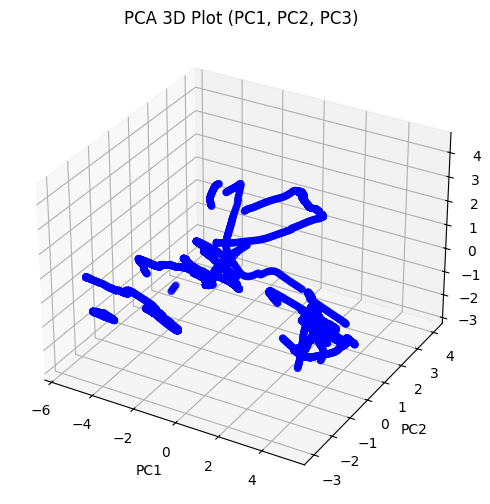

In [50]:
# 3D Scatter Plot for PC1, PC2, PC3
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data in 3D space
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D Plot (PC1, PC2, PC3)")
plt.show()


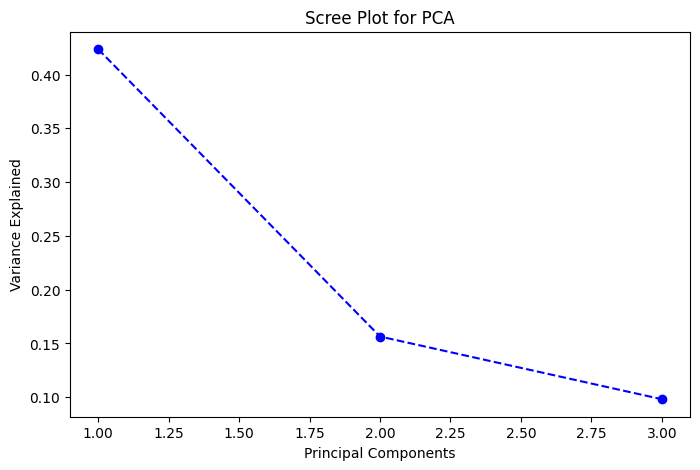

In [32]:
# Scree Plot for PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', color='b', linestyle='--')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot for PCA")
plt.show()


In [ ]:
# Checking if there is a target column (e.g., 'target') to apply LDA
if 'target' in anuj_df.columns:
    target = anuj_df['target']

    # Perform LDA (reduce to 2 components for visualization)
    lda = LDA(n_components=2)
    lda_result = lda.fit_transform(X_scaled, target)

    # Scree Plot for LDA
    lda_explained_variance = lda.explained_variance_ratio_
    print("Explained Variance Ratio (LDA):", lda_explained_variance)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(lda_explained_variance) + 1), lda_explained_variance, marker='o', color='r', linestyle='--')
    plt.xlabel("Linear Discriminants")
    plt.ylabel("Variance Explained")
    plt.title("Scree Plot for LDA")
    plt.show()


In [ ]:
# Run t-SNE to reduce data to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Scatter Plot for t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c='green', alpha=0.7)
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.show()


# SECTION 6: Perform outlier removal, feature selection, and apply Principal Component Analysis (PCA), LDA, t-SNE
***Outlier removal***
 * Z-Score Method (Standardization) Roll No: Even
 * Interquartile Range (IQR) Method Roll No: ODD
 
 ***Feature selection***
* Perform Feature Selection using Lasso Regression(L1 approach) Roll No: Even
* Perform Feature Selection using Ridge Regression(L2 approach) Roll No: ODD

  ***Feature Extraction***
* Perform PCA.
* Print all necessary for PCA results.
* Plot new PC1,PC2,PC3
* Generate a Scree Plot for PCA, LDA.
* Scatter plot for t-SNE

# SECTION 7: Write your observation (computational efficiency and accuracy, etc) from sections 4, 5, and 6